# BAX 452 Assignment 2 : Logistic Regression and Feature Selection Analysis
### Group 10: Yi Yin (Ian) Chen/Priyanka Malhotra/Sushma Niveni Pindiga



- Import packages and data

In [225]:
# Import packages and read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
cancer_df = pd.read_csv('/Users/ianchen/MSBA/BAX452 Machine Learning/Python/Cancer.csv')
# Remove unnamed columns
cancer_df = cancer_df.loc[:, ~cancer_df.columns.str.contains('^Unnamed')]
# Replace spaces in column names
cancer_df.columns = cancer_df.columns.str.replace(' ','_')

### 1. **Data Exploration and Visualization** (15 pts):
- Explore the Breast Cancer Dataset.
- Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features.
- Include any other plots you find interesting and provide brief interpretations.

- **EDA**

In [226]:
# Check the first five row of the data
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [227]:
# Check column names
cancer_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [228]:
# Check the data types
cancer_df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [229]:
# NA summary
cancer_df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [230]:
# Basic stats summary
cancer_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [231]:
# Count diagnosis
cancer_df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [232]:
# Create dummy variable for the diagnosis variable
cancer_df['diagnosis_binary'] = cancer_df['diagnosis'].map({'M':1,'B':0})

In [233]:
# Write functions for histogram, boxplot, scatterplot
def hist(df,col):
    plt.figure(figsize=(10, 5))
    grouped = df.groupby('diagnosis')
    for name, group in grouped:
        plt.hist(group[col], bins=100, edgecolor='black', alpha=0.5, label = name)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

def box(df, col, diagnosis):
    plt.figure(figsize=(10, 5))
    df.boxplot(column = col, by = diagnosis, vert = False)
    plt.xlabel('Value')
    plt.show()

def scatter(df,x,y):
    plt.scatter(df[x], df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"Scatter Plot {x} vs {y}")
    plt.show()

In [234]:
# Define X and Y variables
cancer_df = cancer_df.reindex(sorted(cancer_df.columns), axis=1)
X = cancer_df.drop(['diagnosis','id', 'diagnosis_binary'], axis = 1)
y = cancer_df['diagnosis_binary']
x_vars = X.columns.to_list()

In [235]:
# Write a function to count outliers
def outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).sum()

# Count outliers for variables
outliers_counts = X.apply(outliers)
outliers_counts = pd.DataFrame(outliers_counts)
outliers_counts = outliers_counts.reset_index()
outliers_counts

,index,0
0,area_mean,25
1,area_se,65
2,area_worst,35
3,compactness_mean,16
4,compactness_se,28
5,compactness_worst,16
6,concave_points_mean,10
7,concave_points_se,19
8,concave_points_worst,0
9,concavity_mean,18


In [236]:
# Pick variables with outliers over 30 to plot box-plot

outliers_counts.columns = ['Variables', 'Outliers']
outliers_30 = outliers_counts[outliers_counts['Outliers']>=30]
len(outliers_30)

5

In [237]:
outliers_20 = outliers_counts[outliers_counts['Outliers']>=20]
len(outliers_20)

13

<Figure size 1000x500 with 0 Axes>

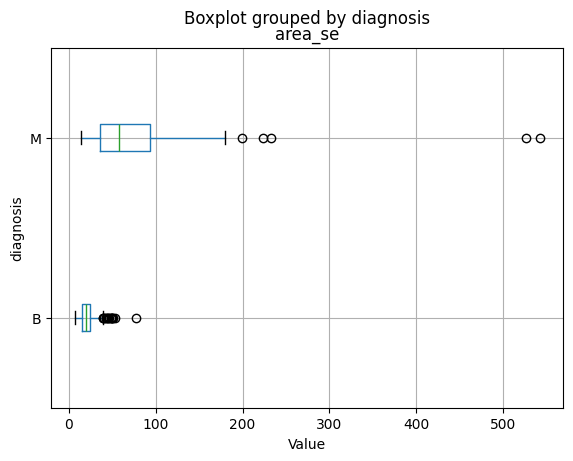

<Figure size 1000x500 with 0 Axes>

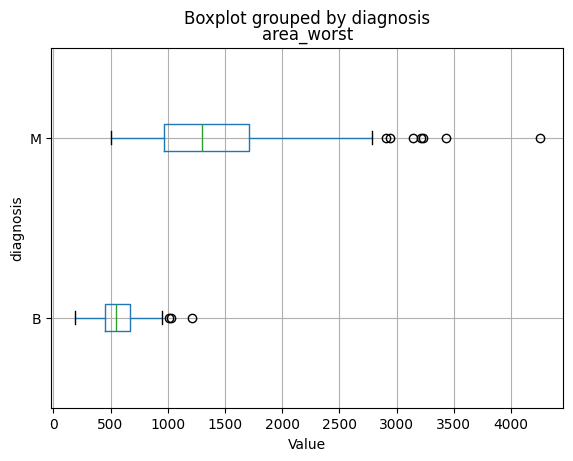

<Figure size 1000x500 with 0 Axes>

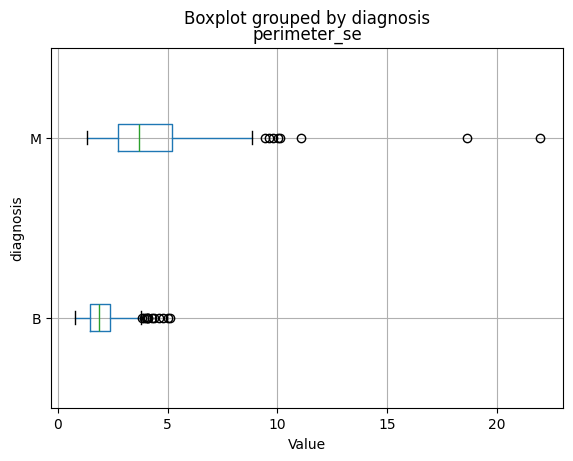

<Figure size 1000x500 with 0 Axes>

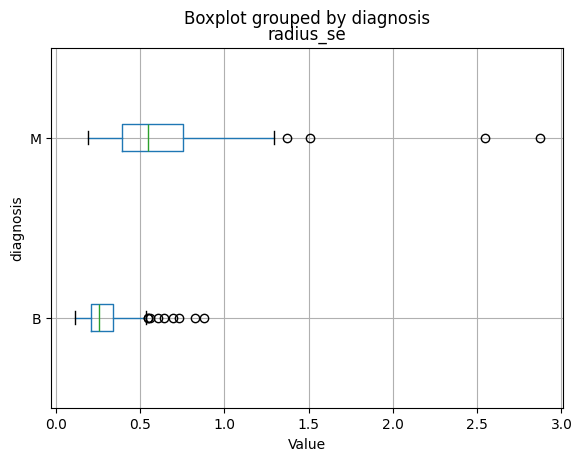

<Figure size 1000x500 with 0 Axes>

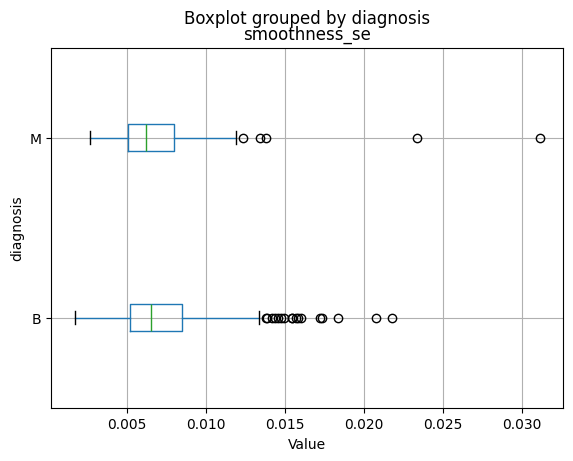

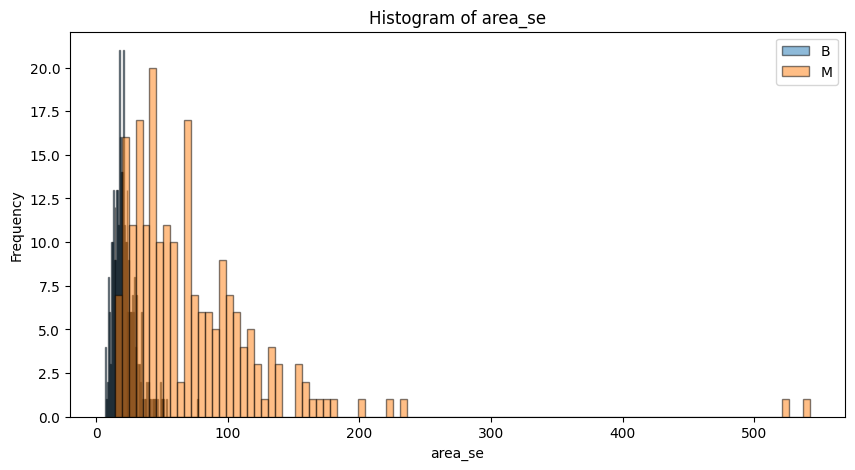

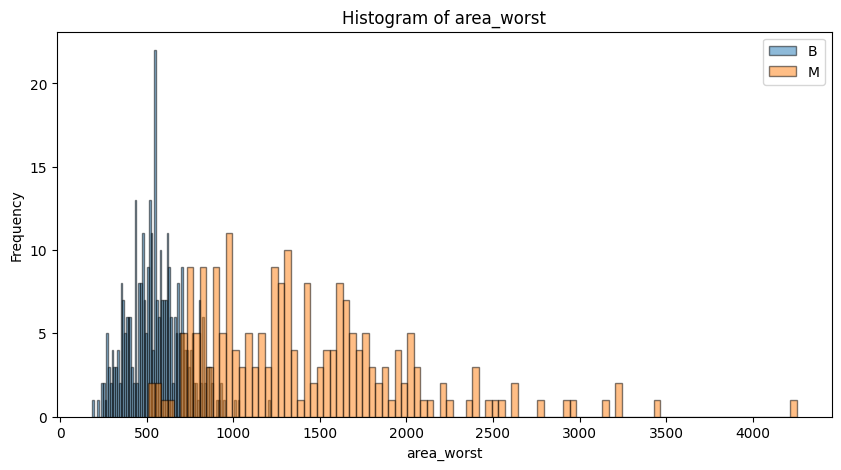

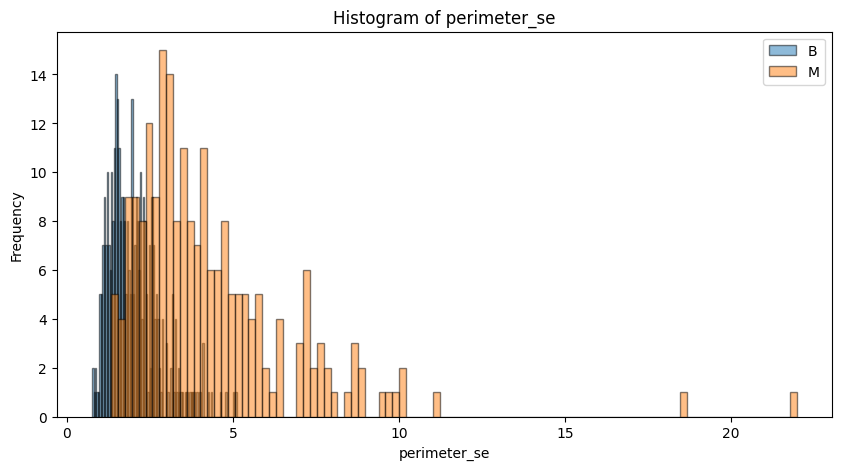

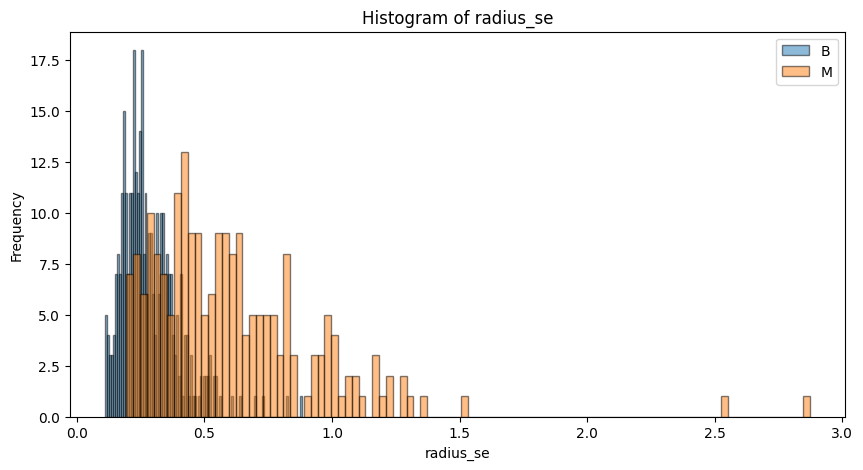

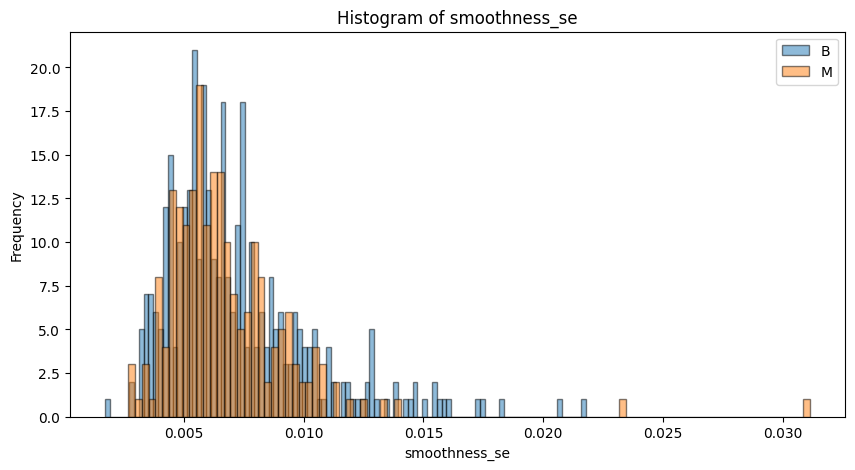

In [238]:
# Plot boxplots for the variables
box_vars = outliers_30['Variables'].to_list()
for i in box_vars:
    box(cancer_df,i, 'diagnosis')

for i in box_vars:
    hist(cancer_df,i)

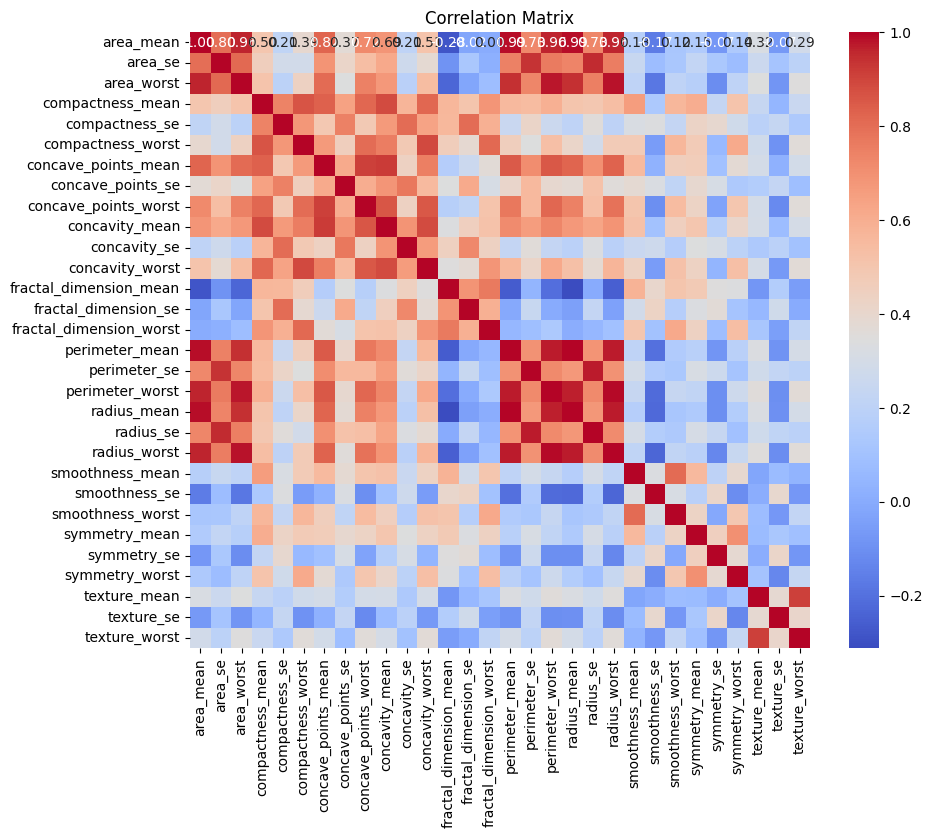

In [239]:
# Create a correlation matrix for the variables and plot
import seaborn as sns
corr_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [240]:
# Pick the correlations greater and equal to 0.9
condition = np.abs(corr_matrix) >= 0.9
corr_matrix_new = corr_matrix[condition]

correlated_pairs = []
for i in range(len(corr_matrix_new.columns)):
    for j in range(i):
        if abs(corr_matrix_new.iloc[i, j]) >= 0.9:
            correlated_pairs.append((corr_matrix_new.columns[i], corr_matrix_new.columns[j], corr_matrix_new.iloc[i, j]))

correlated_pairs_df = pd.DataFrame(correlated_pairs, columns=['var1', 'var2', 'Correlation'])

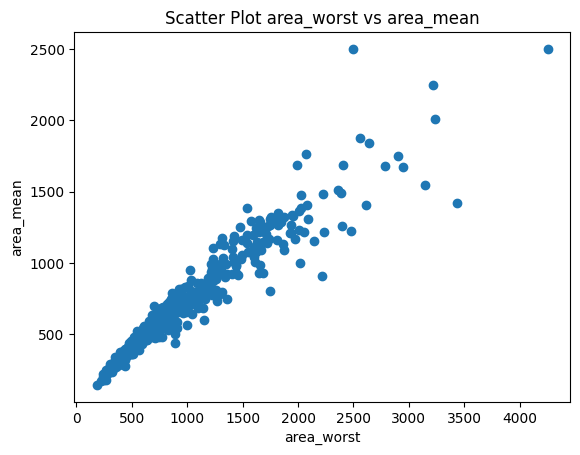

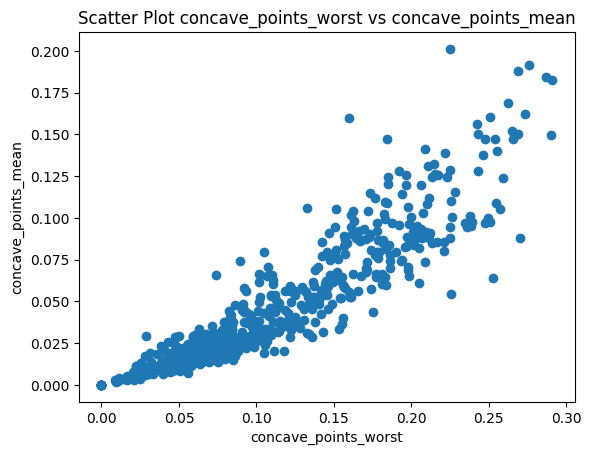

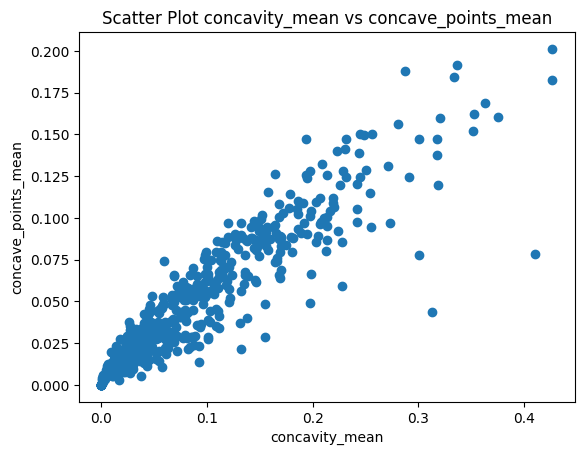

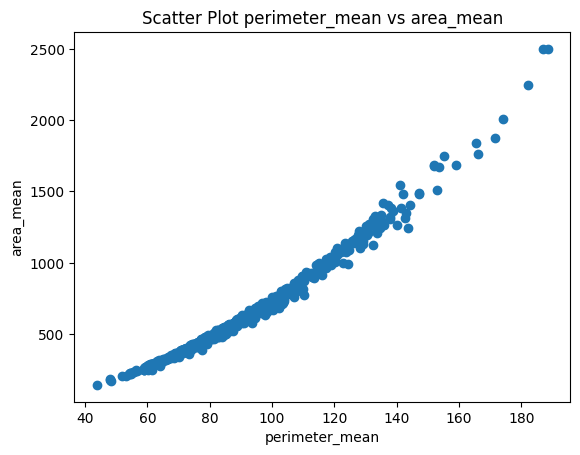

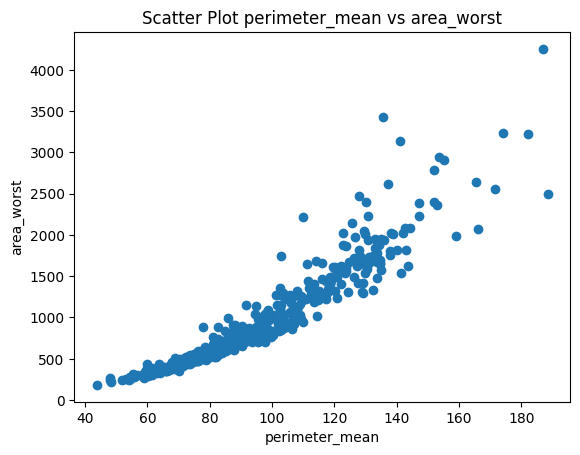

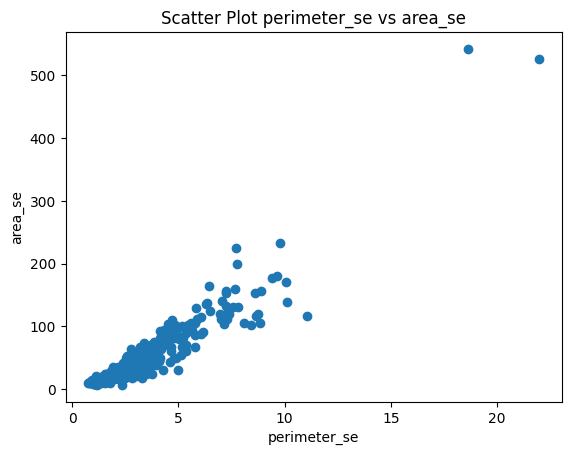

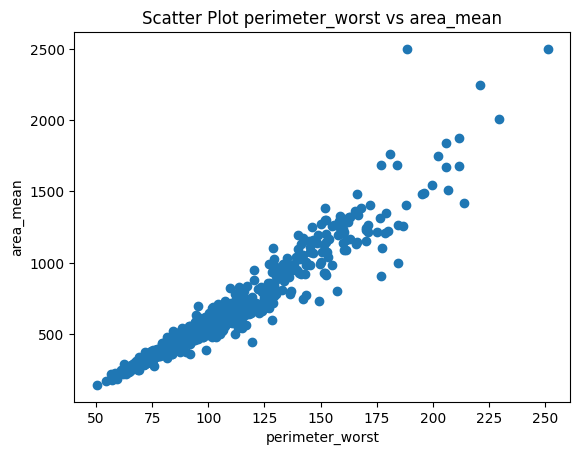

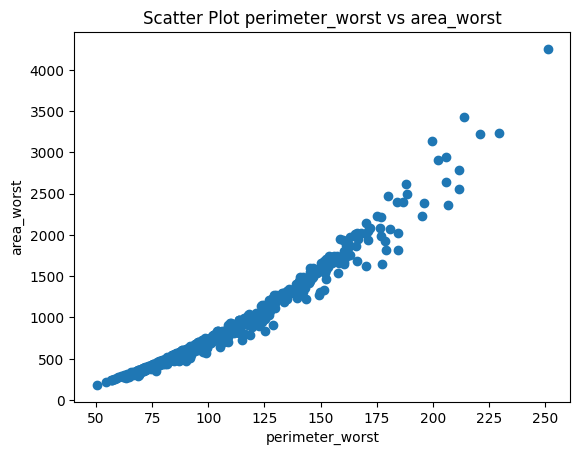

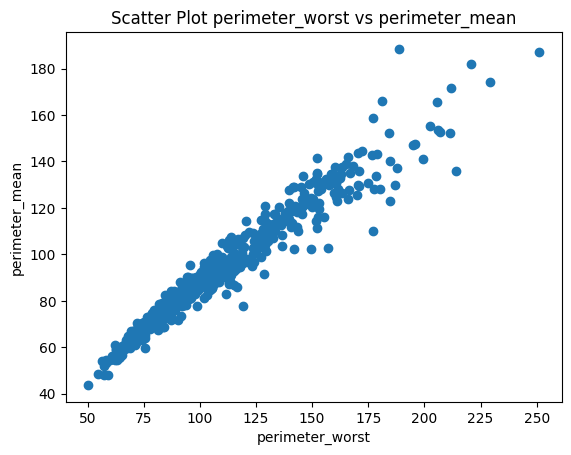

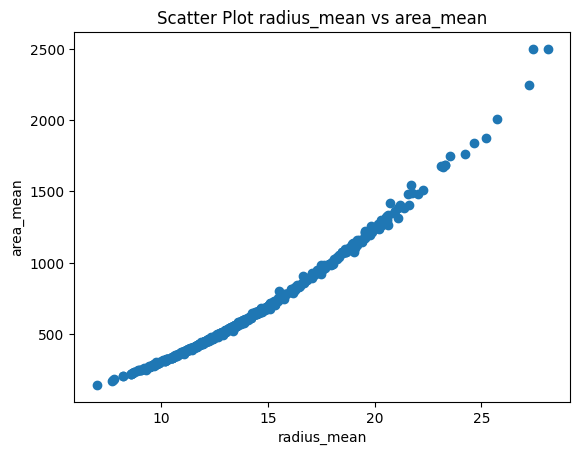

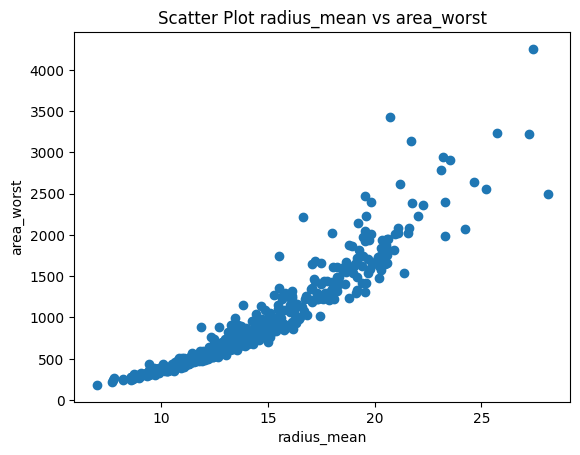

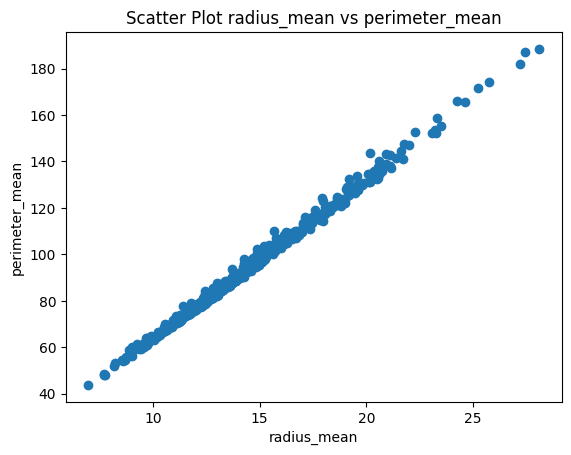

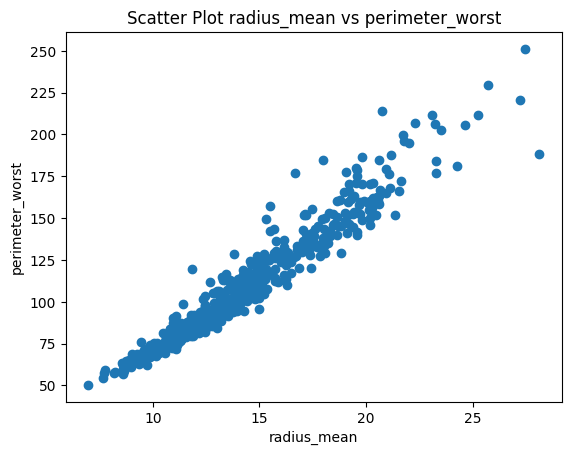

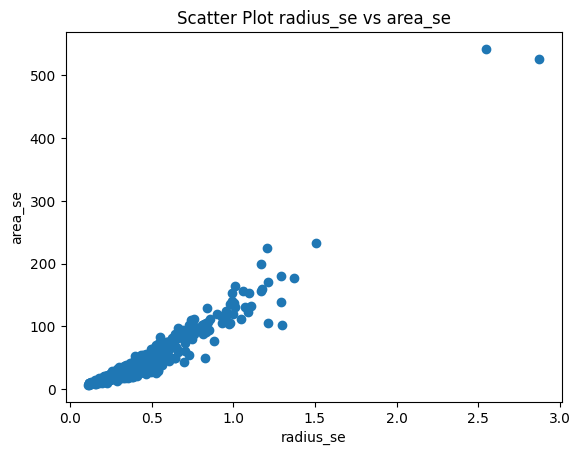

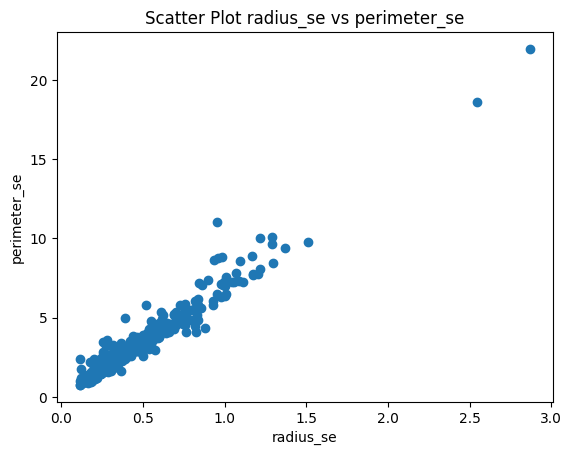

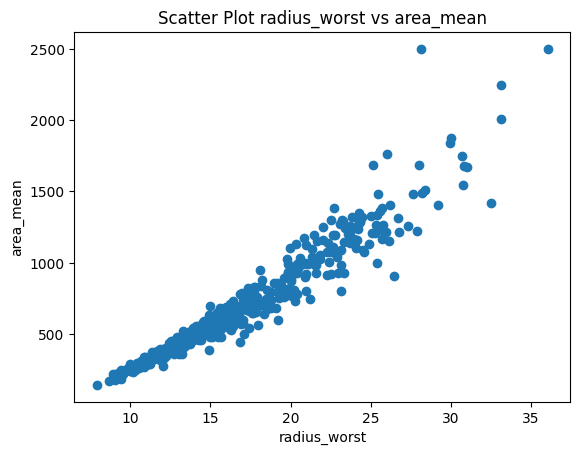

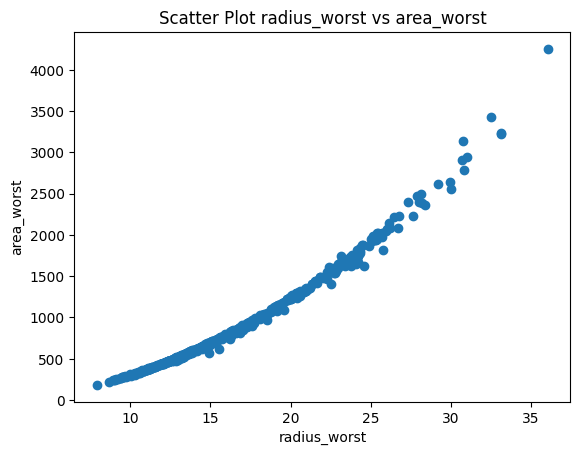

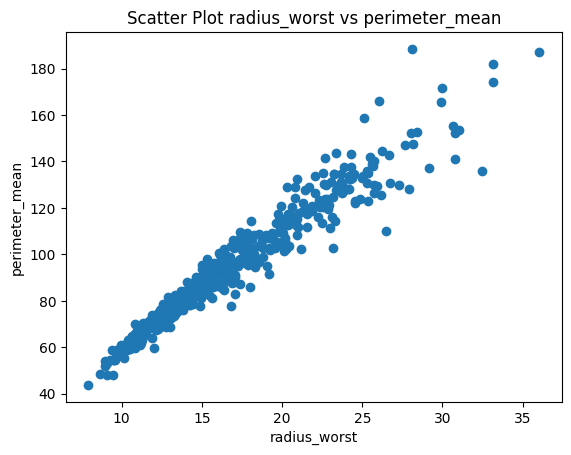

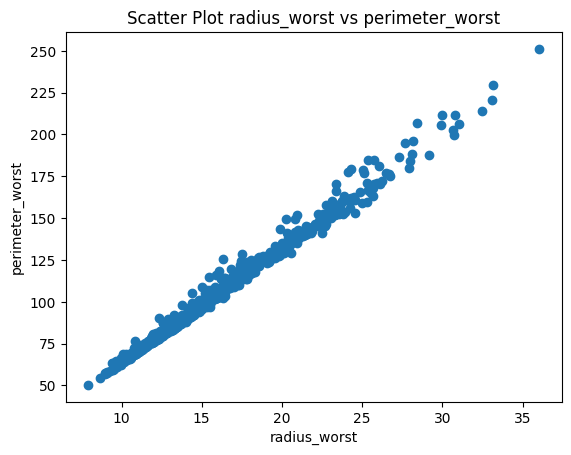

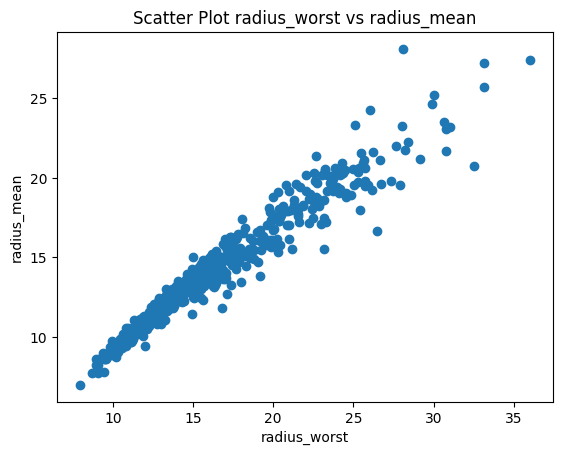

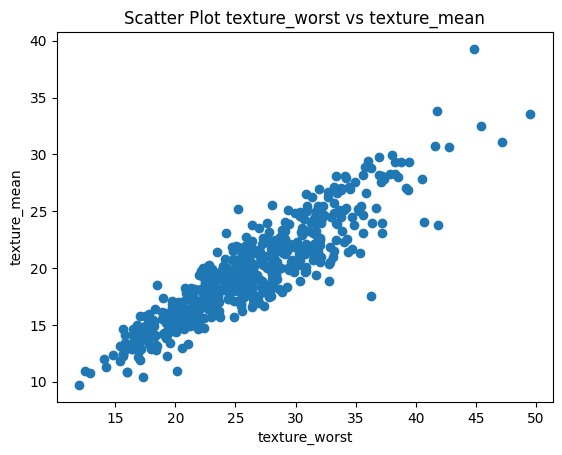

In [241]:
# Plot scatter plots for the high correlated pairs
for i in range(len(correlated_pairs_df)):
    scatter(X,correlated_pairs_df.iloc[i,0], correlated_pairs_df.iloc[i,1])

### Insights

- From the data exploration, we find that there are 30 continuous variable (excluding id) and 1 categorical variable 'diagnosis'

- There are 357 **(62.7%)** observations of benign and 212 **(37.3%)** observations of malignant

- Basic summary shows the continuous data differ in scale, which we have to take into account when handling plots

- Outliers exist in several variables, we located the ones with over 30 to further analyze the box-plots (We used 1.5IQR away from Q1 and Q3)

- Both box-plot and histogram showed right skewed distributions for these variables. Distributions differ by diagnosis

- Scatter plots for correlations >= 0.9 shows some strong relationships between some pair of variables

### Conclusion

- The large amount of outliers in certain variables may be due to the biological nature of the formation of breast mass, and due to the fact that there is a natural lower bound for breast mass measures but no upper limit.

- Most test subjects or individuals would have small or non significant masses, while large masses are generally rare.

- Above might be the reason of the amount of outliers and right skewdness of the distributions.

- The strong correlations we identified could be concluded as a nature of mathematics, as we see most of them are between perimeter, radius and area, or amongst themselves' se, mean or worst. As they have a natural mathematics or statistical relationship between each other.


### 2. **Logistic Regression Model Development** (20 pts):
- Develop a logistic regression model to predict whether cancer is malignant or benign.
- Preprocess the data as necessary (handling missing values, encoding categorical variables, etc.).
- Explain the steps you took in preparing the data and developing the model.
- You might need to encode the values for your prediction.

In [242]:
# Randomly drop one of the variables in high correlated pairs ( >= 0.9 )
# corr_pairs = correlated_pairs_df.drop('Correlation', axis = 1)
# import random
# random.seed(100)
# to_drop = set()
# seen = set()
# for _, row in corr_pairs.iterrows():
#     var1, var2 = row['var1'], row['var2']
#     if var1 in seen or var2 in seen:
#         continue
#     # Randomly choose one variable to drop
#     drop_var = random.choice([var1, var2])
#     to_drop.add(drop_var)
#     seen.update(drop_var)

# X_drop_corr = X.drop(columns=to_drop)
# X_drop_corr = sm.add_constant(X_drop_corr)

In [243]:
# Drop the x variables with >= 20 outliers
# X_drop_out_20 = X.drop(columns = outliers_20['Variables'])
# X_drop_out_20 = sm.add_constant(X_drop_out_20)

In [244]:
# full_model_1 = sm.GLM(y, X_drop_corr, family=sm.families.Binomial()).fit()
# full_model_2 = sm.GLM(y, X_drop_out_30, family=sm.families.Binomial()).fit()
# full_model_3 = sm.GLM(y, X_drop_out_20, family=sm.families.Binomial()).fit()

In [245]:
# print(full_model_1.summary())
# print(full_model_2.summary())
# print(full_model_3.summary())

In [246]:
# Import pakcages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error, r2_score, log_loss
# Drop the x variables with >= 30 outliers, 
X_drop_out_30 = X.drop(columns = outliers_30['Variables'])
X_drop_out_30 = sm.add_constant(X_drop_out_30)
# Break the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_drop_out_30, y, test_size=0.2, random_state=100)
# Fit the regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### Preprocess of the data
- Encoded the 'diagnosis' column with 1 and 0, M being 1, B being 0 into a new column

- There are no NA's in the existing dataframe, which consists of 30 features and 1 binary outcome

- From our EDA, we knew there are high multicollinearity existing in the full model, and there are several features with large outliers, we need to drop some of the features

- After considering between dropping highly correlated pairs(>=0.9) or features with large outliers (>=30), I went for the outlier approach since it does not loose that many variables, and the features that are dropped are also highly correlated to each other

- Fiited the remaining features and our diagnosis in a logistic regression model

### 3. **Model Evaluation** (20 pts):
- Evaluate your logistic regression model using appropriate metrics (e.g., accuracy, R^2, RMSE (all out-of-sample)).
- Split the dataset into training and testing sets to perform this evaluation.
- Interpret these metrics to assess the performance of your model. Is it good? Why?

In [247]:
# Predict using the test set
y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)

In [248]:
# Get the probabilities from the prediction
pd.DataFrame(probs)
probs_1 = probs[:, 1]

In [249]:
# Adjust the cutoff to 0.2
y_pred_new = [1 if i>=0.2 else 0 for i in probs[:, 1]]

**Accuracy Score**

In [250]:
print("Accuracy Score:", accuracy_score(y_test, y_pred_new))

Accuracy Score: 0.956140350877193


**Confusion Matrix**

In [251]:
cm = confusion_matrix(y_test, y_pred_new)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[60  5]
 [ 0 49]]


**Log Loss**

In [252]:
loss = log_loss(y_test, probs_1)
loss

0.0884309582455961

**R Squared**

In [253]:
mean_prob = np.full_like(y_test, y_train.mean())
null_loss = log_loss(y_test, mean_prob)
r_squared = 1 - (loss/null_loss)
r_squared

0.9942919956196602

**RMSE**

In [254]:
mse=mean_squared_error(y_test, probs_1)
np.sqrt(mse)

0.15907241316400536

### Insights

**OOS Analysis**

- Accuracy Score: 0.96

- Confusion Matrix: False positive: 5 False negative: 0

- Log Loss: 0.088

- R squared: 0.99

- RMSE: 0.16

### Conclusion

- Looking at the various metrics, the model performed generally well on predicting out of sample data, with low log loss, RMSE, and false positive/negative, and high R squared and accuract score.

- The cutoff adjustment to 0.2 is to cater to the case, when dealing with cacner diagnosis it is a good idea to have a lower cutoff in order to have fewer false negatives, which may be a high risk for patients.

- The extremely high R squared may be due to the overfitting and still existing multicollinearity in the model even if we dropped a few features, further improvement might be needed.

### 4. **Testing Interactions Between Features** (30 pts):
- Explore and test the interactions between different features in the dataset. Pay particular attention to interactions involving both categorical/dummy and continuous variables.
- For this excercise, use a linear regression rather than a logistic regression model.
- Discuss issues that occur when using a linear regression model to predict binary outcomes.
- Create and analyze interaction terms involving categorical/dummy variables (such as 'diagnosis' converted into a dummy variable) and continuous variables (like 'radius_mean' or 'texture_mean').
- Fit a regression model that includes interaction terms, for example, between 'diagnosis' and 'radius_mean', and between 'diagnosis' and 'texture_mean'.
- Discuss the influence of these interactions on the model. Describe how to interpret these interactions and their implications for understanding the data.

- Since we still had doubt of overfitting in the previous model, I wanted to test out how the model performs when we only use all the 'worst' features, which kind of makes sense when we are trying to preditct if the breast mass is malignant, we look for extreme observations and there relationship with the outcome.

In [255]:
## Pick all the features with 'worst'
selected_columns = [col for col in X.columns if 'worst' in col]
X_reduced = X[selected_columns]

In [256]:
# Break the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=100)
# Fit the regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [257]:
# Predict using the test set
y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)

In [258]:
# Get the probabilities from the prediction
pd.DataFrame(probs)
probs_1 = probs[:, 1]

In [259]:
# Adjust the cutoff to 0.2
y_pred_new = [1 if i>=0.2 else 0 for i in probs[:, 1]]

In [260]:
print("Accuracy Score:", accuracy_score(y_test, y_pred_new))

cm = confusion_matrix(y_test, y_pred_new)
print("Confusion Matrix:\n", cm)

loss = log_loss(y_test, probs_1)
print("Log-loss:", loss)

mse=mean_squared_error(y_test, probs_1)
print("RMSE:", np.sqrt(mse))

mean_prob = np.full_like(y_test, y_train.mean())
null_loss = log_loss(y_test, mean_prob)
r_squared = 1 - (loss/null_loss)
print("R squared:", r_squared)

Accuracy Score: 0.956140350877193
Confusion Matrix:
 [[60  5]
 [ 0 49]]
Log-loss: 0.09977599010502611
RMSE: 0.17789676446709304
R squared: 0.993559701264454


**Reduced model did not perform particularly better than the last one, stick with the last model for the test between features interactions**

In [261]:
# Set up a linear regression with chosen variables and their interaction with diagnosis
predictors = X_drop_out_30.columns.str.replace(' ', '_').to_list()
predictors.pop(0)
original_vars = '+'.join(predictors)
interaction_terms = ' + '.join([f'diagnosis_binary:{var}' for var in predictors])
formula = 'diagnosis_binary ~ ' + original_vars + '+' + interaction_terms
print(formula)
train,test = train_test_split(cancer_df, train_size=0.8)
linear_model = smf.ols(formula, data=train).fit()
linear_model.summary()

diagnosis_binary ~ area_mean+compactness_mean+compactness_se+compactness_worst+concave_points_mean+concave_points_se+concave_points_worst+concavity_mean+concavity_se+concavity_worst+fractal_dimension_mean+fractal_dimension_se+fractal_dimension_worst+perimeter_mean+perimeter_worst+radius_mean+radius_worst+smoothness_mean+smoothness_worst+symmetry_mean+symmetry_se+symmetry_worst+texture_mean+texture_se+texture_worst+diagnosis_binary:area_mean + diagnosis_binary:compactness_mean + diagnosis_binary:compactness_se + diagnosis_binary:compactness_worst + diagnosis_binary:concave_points_mean + diagnosis_binary:concave_points_se + diagnosis_binary:concave_points_worst + diagnosis_binary:concavity_mean + diagnosis_binary:concavity_se + diagnosis_binary:concavity_worst + diagnosis_binary:fractal_dimension_mean + diagnosis_binary:fractal_dimension_se + diagnosis_binary:fractal_dimension_worst + diagnosis_binary:perimeter_mean + diagnosis_binary:perimeter_worst + diagnosis_binary:radius_mean + diag

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       diagnosis_binary   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.246e+04
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:35:34   Log-Likelihood:                 1488.4
No. Observations:                 455   AIC:                            -2875.
Df Residuals:                     404   BIC:                            -2665.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    0.4398      0.025     17.811      0.000       0.391       0.488
area_mean                                    0.0005   3.96e-05     11.593      0.000       0.000       0.001
compactness_mean                             0.2735      0.102      2.688      0.007       0.073       0.474
compactness_se                              -0.5647      0.193     -2.919      0.004      -0.945      -0.184
compactness_worst                            0.0191      0.044      0.438      0.662      -0.067       0.105
concave_points_mean                          0.0063      0.163      0.039      0.969      -0.314       0.326
concave_points_se                            0.3664      0.395      0.927      0.354      -0.410       1.143
concave_points_worst                         0.0616      0.074      0.836      0.404      -0.083       0.206
concavity_mean                              -0.1302      0.109     -1.194      0.233      -0.345       0.084
concavity_se                                 0.0627      0.115      0.547      0.585      -0.163       0.288
concavity_worst                              0.0066      0.028      0.238      0.812      -0.048       0.061
fractal_dimension_mean                      -2.5984      0.318     -8.174      0.000      -3.223      -1.973
fractal_dimension_se                         1.9531      0.737      2.650      0.008       0.504       3.402
fractal_dimension_worst                      0.2002      0.178      1.124      0.262      -0.150       0.550
perimeter_mean                               0.0059      0.003      2.359      0.019       0.001       0.011
perimeter_worst                             -0.0009      0.000     -2.032      0.043      -0.002      -3e-05
radius_mean                                 -0.0746      0.017     -4.456      0.000      -0.108      -0.042
radius_worst                                 0.0010      0.003      0.309      0.758      -0.005       0.007
smoothness_mean                              0.2177      0.130      1.669      0.096      -0.039       0.474
smoothness_worst                            -0.2315      0.072     -3.230      0.001      -0.372      -0.091
symmetry_mean                               -0.0682      0.046     -1.491      0.137      -0.158       0.022
symmetry_se                                 -0.1119      0.203     -0.552      0.581      -0.511       0.287
symmetry_worst                               0.0222      0.038      0.579      0.563      -0.053       0.098
texture_mean                                -0.0003      0.001     -0.595      0.552      -0.001       0.001
texture_se                                   0.0002      0.002      0.083      0.934      -0.004       0.004
texture_worst                  

In [262]:
# Predict with the test data
X_test = test.drop(columns = outliers_30['Variables'])
X_test = X_test.drop(['id','diagnosis'], axis = 1)
X_test = sm.add_constant(X_test)
y_pred = linear_model.predict(X_test)

470    0.012088
23     0.998266
413    0.014046
266    0.011444
238   -0.003679
         ...   
528   -0.005192
285   -0.009687
113   -0.007193
375    0.014963
165    0.006811
Length: 114, dtype: float64


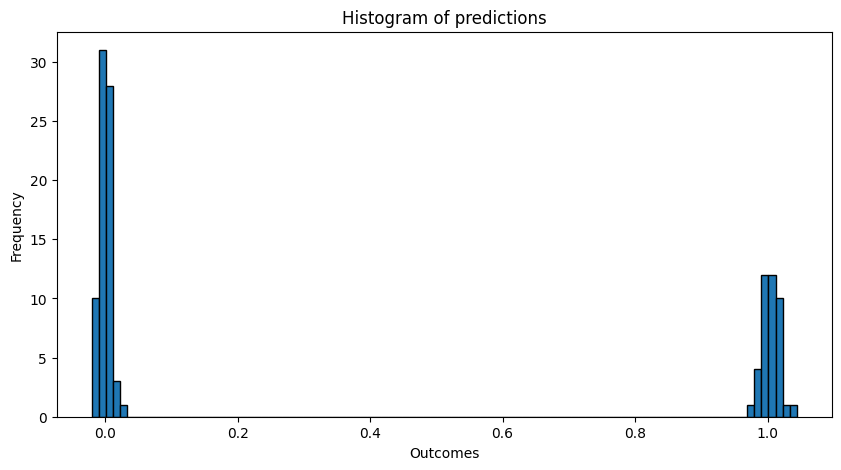

In [263]:
# Show predictions
print(y_pred)
plt.figure(figsize=(10, 5))
plt.hist(y_pred, bins=100, edgecolor='black', alpha=1)
plt.title(f"Histogram of predictions")
plt.xlabel("Outcomes")
plt.ylabel("Frequency")
plt.show()

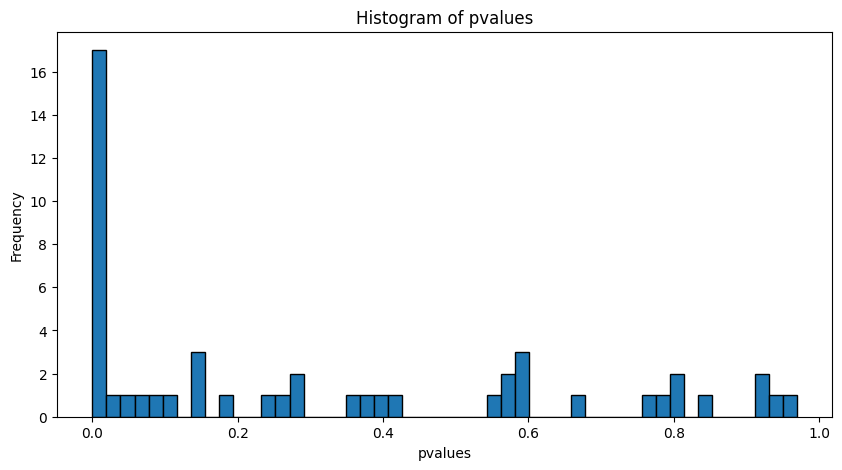

In [264]:
pval_df = linear_model.pvalues.reset_index()
pval_df = pval_df.iloc[1:]
pval_df.columns = ['variable', 'pvalue']
plt.figure(figsize=(10, 5))
plt.hist(pval_df['pvalue'], bins=50, edgecolor='black', alpha=1)
plt.title(f"Histogram of pvalues")
plt.xlabel("pvalues")
plt.ylabel("Frequency")
plt.show()

In [265]:
significant = pval_df[pval_df['pvalue']<= 0.05]
print(significant)

                                   variable        pvalue
1                                 area_mean  5.046183e-27
2                          compactness_mean  7.492418e-03
3                            compactness_se  3.707027e-03
11                   fractal_dimension_mean  3.895311e-15
12                     fractal_dimension_se  8.354419e-03
14                           perimeter_mean  1.880313e-02
15                          perimeter_worst  4.283549e-02
16                              radius_mean  1.082388e-05
19                         smoothness_worst  1.341209e-03
26               diagnosis_binary:area_mean  2.748980e-45
27        diagnosis_binary:compactness_mean  3.509010e-11
28          diagnosis_binary:compactness_se  1.595486e-06
30     diagnosis_binary:concave_points_mean  1.252148e-02
36  diagnosis_binary:fractal_dimension_mean  2.092707e-36
37    diagnosis_binary:fractal_dimension_se  8.009785e-09
40         diagnosis_binary:perimeter_worst  2.344871e-02
41            

### Insights

- Issues with linear regression: Linear regression assumes continuous y variable, in this case the outcome is binary. This will cause the prediction to fall outside of the constraint of 0 and 1, which can be seen in the plot of outcomes above. There is also issues with non-constant variance biased estimates when we fit a linear regression with binary outcomes.

- Influence of interactions: The coefficients we see of the interaction terms, can be interpreted as how the continuous variables(area_mean, perimeter mean...) affect the outcome depending on the category (whether diagnosed as benign or malignant). In simplier words, in this case it seems to mean whether the patient is diagnosed has a impact on how these continuous predictors effect the likelihood of being diagnosed.

- Interpreting interactions: There are 10 interaction terms that we identify as significant (pval <= 0.05), all of them have a positive coefficient, which means that being in the category Malignant has a positive effect on these continuous variables effect on the outcome.

### 5. **Feature Selection and Cross-Validation: Full vs. Reduced Model** (15 pts):
- Create a reduced model using only a subset of significant predictors. You can use methods like FDR Cutoff, forward selection, backward elimination, or any other appropriate feature selection technique.
- Compare the performance of the full model (using all predictors) with the reduced model (using significant predictors) using 10-fold cross-validation.
- Evaluate the out-of-sample performance for both models across folds and discuss which model performs better and why.

In [266]:
# Drop the x variables with >= 30 outliers, 
X_full = X.drop(columns = outliers_30['Variables'])
X_full = sm.add_constant(X_full)
# Break the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_drop_out_30, y, test_size=0.2, random_state=100)
# Fit the regression model
model_full = sm.Logit(y_train, X_train).fit()
model_full.summary()

Optimization terminated successfully.
         Current function value: 0.038579
         Iterations 21


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       diagnosis_binary   No. Observations:                  455
Model:                          Logit   Df Residuals:                      429
Method:                           MLE   Df Model:                           25
Date:                Thu, 25 Jan 2024   Pseudo R-squ.:                  0.9409
Time:                        17:35:35   Log-Likelihood:                -17.554
converged:                       True   LL-Null:                       -296.84
Covariance Type:            nonrobust   LLR p-value:                5.226e-102
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -42.2836     52.606     -0.804      0.422    -145.390      60.822
area_mean                   0.1210      0.079      1.542      0.123      -0.033       0.275
compactness_mean          -66.3734     97.009     -0.684      0.494    -256.507     123.760
compactness_se            202.0155    206.251      0.979      0.327    -202.229     606.260
compactness_worst         -31.7099     40.966     -0.774      0.439    -112.002      48.582
concave_points_mean       135.8086    137.719      0.986      0.324    -134.116     405.733
concave_points_se        1565.3182    697.306      2.245      0.025     198.624    2932.013
concave_points_worst      -96.5817     88.839     -1.087      0.277    -270.703      77.539
concavity_mean             67.2963     75.922      0.886      0.375     -81.507     216.100
concavity_se             -269.5184    160.753     -1.677      0.094    -584.588      45.552
concavity_worst            39.2594     34.351      1.143      0.253     -28.068     106.587
fractal_dimension_mean   -121.9999    376.579     -0.324      0.746    -860.080     616.080
fractal_dimension_se    -3482.4399   1412.651     -2.465      0.014   -6251.186    -713.694
fractal_dimension_worst   486.5022    234.704      2.073      0.038      26.491     946.513
perimeter_mean             -2.7951      2.687     -1.040      0.298      -8.061       2.471
perimeter_worst             0.3071      0.492      0.625      0.532      -0.656       1.271
radius_mean                 3.5745     18.243      0.196      0.845     -32.182      39.331
radius_worst                4.1402      3.399      1.218      0.223      -2.522      10.802
smoothness_mean           233.5822    169.942      1.374      0.169     -99.499     566.663
smoothness_worst           -3.9821     81.780     -0.049      0.961    -164.267     156.303
symmetry_mean              -3.9983     62.757     -0.064      0.949    -127.001     119.004
symmetry_se                68.7451    234.592      0.293      0.769    -391.046     528.537
symmetry_worst             -0.6368     38.079     -0.017      0.987     -75.270      73.997
texture_mean                0.4914      0.605      0.812      0.417      -0.695       1.677
texture_se                 -2.2575      3.612     -0.625      0.532      -9.337       4.822
texture_worst               0.4375      0.558      0.785      0.433      -0.655       1.530
===========================================================================================

Possibly complete quasi-separation: A fraction 0.78 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [267]:
# Test
y_full_pred_proba = model_full.predict(X_test)
y_full_pred = [1 if x >0.2 else 0 for x in y_full_pred_proba]

In [268]:
# Print the performance metrics
print("Accuracy Score:", accuracy_score(y_test, y_full_pred))
accuracy = accuracy_score(y_test, y_full_pred)

cm = confusion_matrix(y_test, y_full_pred)
print("Confusion Matrix:\n", cm)

loss = log_loss(y_test, y_full_pred_proba)
print("Log-loss:", loss)

mse=mean_squared_error(y_test, y_full_pred_proba)
print("RMSE:", np.sqrt(mse))
rmse = np.sqrt(mse)

mean_prob = np.full_like(y_test, y_train.mean())
null_loss = log_loss(y_test, mean_prob)
r_squared = 1 - (loss/null_loss)
print("R squared:", r_squared)

Accuracy Score: 0.9649122807017544
Confusion Matrix:
 [[62  3]
 [ 1 48]]
Log-loss: 0.06630410133964816
RMSE: 0.131597994964459
R squared: 0.995720230693078


In [269]:
# Store metrics
compare_df = pd.DataFrame()
compare_df['Metrics'] = ['Accuracy','Log_Loss','RMSE','R_squared']
f_results = [accuracy,loss,rmse,r_squared]
compare_df['full_model'] = f_results

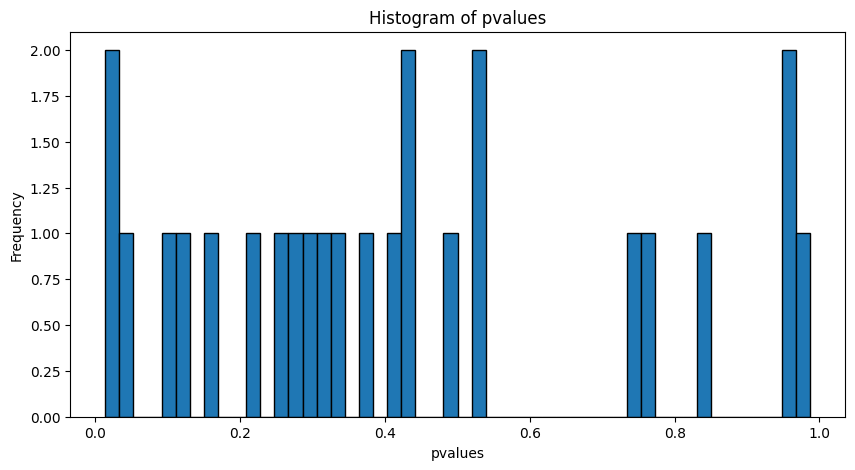

In [270]:
# Extract pvalues
pvalues_full = model_full.pvalues.reset_index()
pvalues_full.columns = ['variables','pvalue']
pvalues_full = pvalues_full.iloc[1:]
plt.figure(figsize=(10, 5))
plt.hist(pvalues_full['pvalue'], bins=50, edgecolor='black', alpha=1)
plt.title(f"Histogram of pvalues")
plt.xlabel("pvalues")
plt.ylabel("Frequency")
plt.show()

**FDR function**

In [271]:
def fdr(pvals, q, plotit=False):
  # Remove NA values
  pvals = np.array(pvals)
  pvals = pvals[~np.isnan(pvals)]
  N = len(pvals)
  
  # Sort the p-values and calculate the FDR threshold
  sorted_pvals = np.sort(pvals)
  k = np.arange(1, N+1)
  fdr_threshold = (q * k) / N
  
  # Find the last p-value that is below the FDR threshold
  below_threshold = sorted_pvals <= fdr_threshold
  max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
  alpha = sorted_pvals[max_index]
  
  # Optional plot
  if plotit:
    plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
    plt.yscale('log')
    plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
    plt.xlabel("Tests ordered by p-value")
    plt.ylabel("p-values")
    plt.title(f"FDR = {q}")
    plt.show()
  
  return alpha

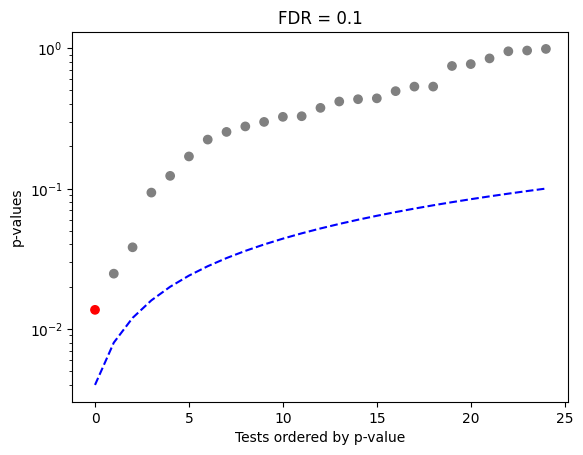

Threshold p-value at 10% FDR: 0.0137


In [272]:
# Run through FDR
threshold = fdr(pvalues_full['pvalue'], 0.1, plotit=True)
print(f"Threshold p-value at 10% FDR: {threshold:.4f}")


In [273]:
# Extract significant predictors
significant_predictors = pvalues_full['variables'][pvalues_full['pvalue'] <= 0.0137].tolist()
print(significant_predictors)

['fractal_dimension_se']


In [274]:
# Build the reduced model
X_reduced = X['fractal_dimension_se']
X_reduced = sm.add_constant(X_reduced)
# Break the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=100)
# Fit the regression model
model_reduced = sm.Logit(y_train, X_train).fit()
model_reduced.summary()

Optimization terminated successfully.
         Current function value: 0.649140
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       diagnosis_binary   No. Observations:                  455
Model:                          Logit   Df Residuals:                      453
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Jan 2024   Pseudo R-squ.:                0.004997
Time:                        17:35:35   Log-Likelihood:                -295.36
converged:                       True   LL-Null:                       -296.84
Covariance Type:            nonrobust   LLR p-value:                   0.08501
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.8360      0.178     -4.691      0.000      -1.185      -0.487
fractal_dimension_se    65.8157     38.461      1.711      0.087      -9.566     141.198
========================================================================================
"""

In [275]:
# Test
y_reduced_pred_proba = model_reduced.predict(X_test)
y_reduced_pred = [1 if x >0.2 else 0 for x in y_reduced_pred_proba]

In [276]:
# Print the performance metrics
print("Accuracy Score:", accuracy_score(y_test, y_reduced_pred))
accuracy = accuracy_score(y_test, y_reduced_pred)

cm = confusion_matrix(y_test, y_reduced_pred)
print("Confusion Matrix:\n", cm)

loss = log_loss(y_test, y_reduced_pred_proba)
print("Log-loss:", loss)

mse=mean_squared_error(y_test, y_reduced_pred_proba)
print("RMSE:", np.sqrt(mse))
rmse = np.sqrt(mse)

mean_prob = np.full_like(y_test, y_train.mean())
null_loss = log_loss(y_test, mean_prob)
r_squared = 1 - (loss/null_loss)
print("R squared:", r_squared)

Accuracy Score: 0.4298245614035088
Confusion Matrix:
 [[ 0 65]
 [ 0 49]]
Log-loss: 0.6925244275760299
RMSE: 0.4994277791148505
R squared: 0.9552992238858484


In [277]:
# Store metrics
r_results = [accuracy,loss,rmse,r_squared]
compare_df['reduced_model'] = r_results

In [278]:
compare_df

,Metrics,full_model,reduced_model
0,Accuracy,0.964912,0.429825
1,Log_Loss,0.066304,0.692524
2,RMSE,0.131598,0.499428
3,R_squared,0.995720,0.955299


**Test Train Split results indicate the original model performs better**

### Cross validation

In [279]:
# 10-fold
from sklearn.model_selection import cross_val_score
full_model = LogisticRegression(max_iter=10000)
full_score = cross_val_score(full_model, X_full, y, cv=10, scoring = 'accuracy')
reduced_model = LogisticRegression(max_iter=10000)
reduced_score = cross_val_score(reduced_model, X_reduced, y, cv=10, scoring = 'accuracy')

In [280]:
# Print results
full_avg_score = np.mean(full_score)
reduced_avg_score = np.mean(reduced_score)
print("Full Model's 10 Fold scores:\n", full_score)
print("Reduced Model's 10 Fold scores:\n", reduced_score)
print(f"Full Model Average Score: {full_avg_score}")
print(f"Reduced Model Average Score: {reduced_avg_score}")

Full Model's 10 Fold scores:
 [0.98245614 0.92982456 0.94736842 0.94736842 1.         0.96491228
 0.94736842 0.92982456 0.96491228 0.96428571]
Reduced Model's 10 Fold scores:
 [0.61403509 0.61403509 0.63157895 0.63157895 0.63157895 0.63157895
 0.63157895 0.63157895 0.63157895 0.625     ]
Full Model Average Score: 0.9578320802005011
Reduced Model Average Score: 0.6274122807017544


### Insights

- Due to the multicollinearity in the full model, we could not fit a working model with all variables, I went with the model from question 2 (dropping variables with large outliers), using a total of 25 variables.

- Proceeded on feature selection using the FDR control, setting q at 0.1 (10% false detection rate).

- The method suggests only one feature is significant.

- Fiited a reduced model and compared the performance using test train split and 10 fold cross validation.

- Both the test train split and 10 fold CV suggests the original model with 25 predictors performed better, it had better performing OOS metrics such as accuracy, RMSE, log-loss and false positives.

- The 10 fold CV shows the original model had a average accuracy of 0.957 compared to the reduced model's 0.627.

- The results highly suggests the original model is better at prediction, and is pretty obvious since the reduced model only has one predictor, making it too simple to make accurate predictions.